### Documentacao Selenium:

- https://selenium-python.readthedocs.io/locating-elements.html


# PRESTAR ATENÇÃO - PREENCHIMENTO DOS CAMPOS:

Para todos os campos com preenchimentos personalizado, talvez seja necessário verificar como é enviado o campo. Por exemplo, data e hora, hora específica ou outros neste sentido.
Muitas vezes, o keys.TAB pode funcionar, mas há casos que são as setas ou outros botões.
Oque é possível ser feito:
- Testar adicionar os itens simultaneamente, separando por espaço;
- Testar adicionar os itens com keys.TAB;
- Testar adicionar os itens separados por vírgula - ('15/02/1994', '22:00')
- Testar a seguinte forma: ('15/02/1994', Keys.TAB, '22:00')

Tela base do form, a fim de nortear a que se referem os campos

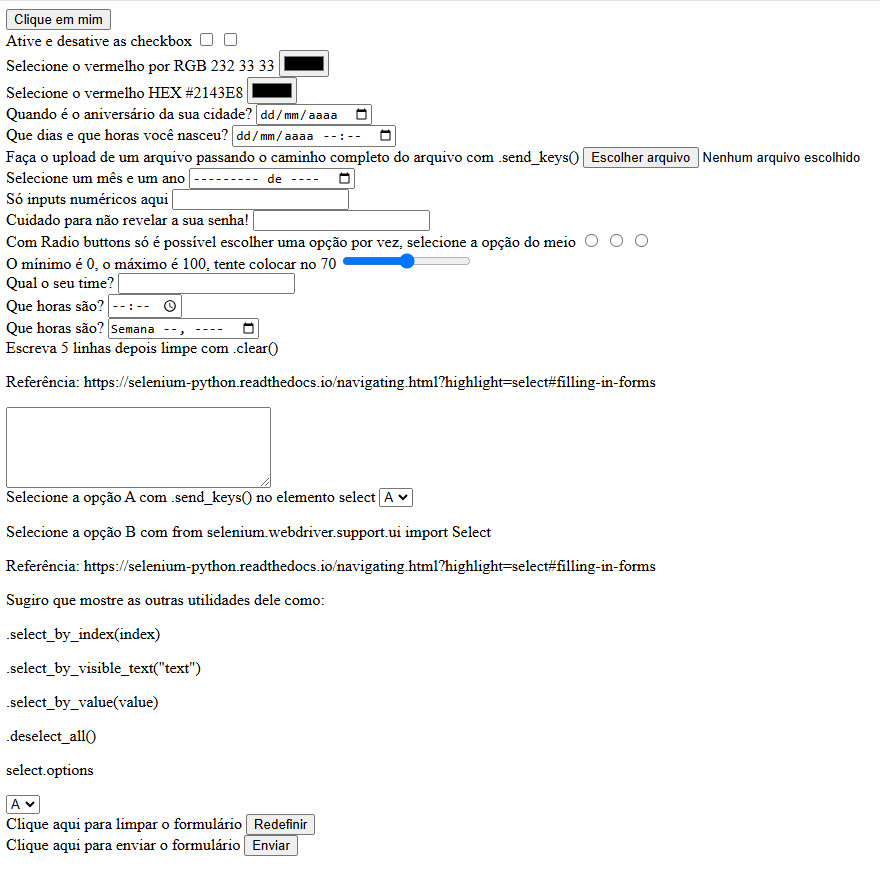

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

servico = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=servico)




====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\joaol\.wdm\drivers\chromedriver\win32\99.0.4844.51]


In [ ]:
import os

caminho = os.getcwd()
arquivo = caminho + r"\formulario.html"
navegador.get(arquivo)

#### Botao Padrao (clicar em botao)

In [ ]:
navegador.find_element(By.XPATH, '/html/body/form/input[1]').click()

# REMOVER POP-UPS
alerta = navegador.switch_to.alert
alerta.accept()
# alerta.dismiss()

#### Dica, esteja atento ao atributo "value" dos inputs, ele pode te ajudar

- .text
- .get_attribute("value") - Muito utilizado para verificar o valor atribuído a um determinado elemento
- .is_selected

#### Botao de Selecao estilo Checkbox (clicar no botao)

In [ ]:
# clicar no botao
navegador.find_element(By.XPATH, '/html/body/form/input[2]').click()

In [ ]:
# verificar o valor do botao
valor = navegador.find_element(By.XPATH, '/html/body/form/input[2]').is_selected()
print(valor)

True


#### Botao de Selecao de Cores (enviar valor)

In [ ]:
# preencher a cor
navegador.find_element(By.XPATH, '/html/body/form/input[5]').send_keys('#2143E8')

In [ ]:
# verificar qual a cor foi selecionada
valor = navegador.find_element(By.XPATH, '/html/body/form/input[4]').get_attribute("value")
print(valor)

#000000


#### Botao de Datas (enviar valor)

In [ ]:
# IMPORTANTE - CAMPOS DE DATA E HORA O PREENCHIMENTO PODE SER VARIADO, DEPENDE DE COMO FOI FEITO O SITE.
# Pode ser necessário testar, mas é possível identificar ou facilita os testes por padrão visual

# preencher o valor
navegador.find_element(By.XPATH, '/html/body/form/input[6]').send_keys('15/02/1994')

In [ ]:
# Ao pegar o valor de um campo de data, é possível que ele seja retornado em formato diferente do formato passado
# pegar o valor
valor = navegador.find_element(By.XPATH, '/html/body/form/input[6]').get_attribute("value")
print(valor)

1994-02-15


#### Botao de Datas com Horas (enviar valor)

In [ ]:
# IMPORTANTE - Campo possui duas informações. Ao passar como espaço " ", não passa corretamente. Necessário utilizar o Keys.TAB

# Necessário importar o Keys - permite utilização do teclado
# preenchendo
from selenium.webdriver.common.keys import Keys

navegador.find_element(By.XPATH, '/html/body/form/input[7]').send_keys('15/02/1994', Keys.TAB, '22:00')

In [ ]:
# pegando o valor
valor = navegador.find_element(By.XPATH, '/html/body/form/input[7]').get_attribute("value")
print(valor)

1994-02-15T22:00


#### Botao para selecionar o arquivo (enviar valor com caminho completo)

In [ ]:
# preenchendo

caminho = os.getcwd()
arquivo = caminho + r"\formulario.html"

navegador.find_element(By.XPATH, '/html/body/form/input[8]').send_keys(arquivo)

In [ ]:
# pegar o valor
valor = navegador.find_element(By.XPATH, '/html/body/form/input[8]').get_attribute("value")
print(valor)

C:\fakepath\formulario.html


#### Botao para selecionar mes e ano (enviar valor)

In [ ]:
# preenche
navegador.find_element(By.XPATH, '/html/body/form/input[9]').send_keys('janeiro', Keys.TAB, '1980')
# pegar o valor
valor = navegador.find_element(By.XPATH, '/html/body/form/input[9]').get_attribute('value')
print(valor)

1980-01


#### Campos Numericos

In [ ]:
navegador.find_element(By.XPATH, '/html/body/form/input[10]').clear()
navegador.find_element(By.XPATH, '/html/body/form/input[10]').send_keys("123456")

#### Campos de Senha

In [ ]:
# preencher
navegador.find_element(By.XPATH, '/html/body/form/input[11]').send_keys("123456")
# pego o valor
valor = navegador.find_element(By.XPATH, '/html/body/form/input[11]').get_attribute('value')
print(valor)

123456


#### RadioButtons (botoes que so consegue marcar 1)

In [ ]:
# Para selecionar um dos botões do RadioButton, basta pegar o XPATH, pois cada campo do RB possui seu próprio path, mesmo que sejam referentes ao mesmo campo.
navegador.find_element(By.XPATH, '/html/body/form/input[14]').click()

In [ ]:
# VERIFICAR SE ESTÁ SELECIONADO

valor = navegador.find_element(By.XPATH, '/html/body/form/input[14]').is_selected()
valor = navegador.find_element(By.XPATH, '/html/body/form/input[13]').is_selected()
print(valor)

True


#### Slider (enviar valor)

In [ ]:
# pegar o valor
valor = navegador.find_element(By.XPATH, '/html/body/form/input[15]').get_attribute('value')
print(valor)

50


In [ ]:
# preencher o valor
# Para obter o range do slider, no html, o input type é range e mostra min e max
elemento = navegador.find_element(By.XPATH, '/html/body/form/input[15]')

# Utiliza-se o clear() para garantir que o dado está no meio do range. No nosso caso, 50.
elemento.clear() # Ao utilizar o clear, o slider volta para o meio do range.

# Ao utilizar desta forma: pega-se o valor mediano (50) e subtrai-se até o valor desejado
# Ou seja, quero chegar em 30. Executa 20 vezes a seta para esquerda
for i in range(50 - 30):
    elemento.send_keys(Keys.ARROW_LEFT)

# Deslocar para a esquerda:
# for i in range(70 - 50):
#     elemento.send_keys(Keys.ARROW_RIGHT)

#### Caixa de Texto

In [ ]:
# preencher
navegador.find_element(By.XPATH, '/html/body/form/input[16]').send_keys("Vasco")

In [ ]:
valor = navegador.find_element(By.XPATH, '/html/body/form/input[16]').get_attribute("value")
print(valor)

Vasco


#### Caixa de Horas

In [ ]:
navegador.find_element(By.XPATH, '/html/body/form/input[17]').send_keys('15:15')

#### Caixa de Data Personalizada (Semanal)

In [ ]:
navegador.find_element(By.XPATH, '/html/body/form/input[18]').send_keys('17', '2005')

#### Blocos de texto (enviar valor)

In [ ]:
# Keys.ENTER é utilizado para quebrar textos com o Enter

navegador.find_element(By.XPATH, '//*[@id="story"]').clear()
navegador.find_element(By.XPATH, '//*[@id="story"]').send_keys("Olá", Keys.ENTER, 'Meu nome é Lucas', Keys.ENTER, 'Valeu, Tmj')

#### Selecionando itens de uma lista

In [ ]:
# preencher o valor
navegador.find_element(By.XPATH, '/html/body/form/select[1]').send_keys('B')

In [ ]:
# pegando o valor
valor = navegador.find_element(By.XPATH, '/html/body/form/select[1]').get_attribute('value')
print(valor)

b


In [ ]:
# clicando para selecionar
import time
navegador.find_element(By.XPATH, '/html/body/form/select[1]').click()
time.sleep(0.5)
# Seleciona a terceira opção da caixa de seleção
navegador.find_element(By.XPATH, '/html/body/form/select[1]/option[3]').click()

In [ ]:
# com o select
# proxima aula
# https://www.selenium.dev/pt-br/documentation/webdriver/elements/select_lists/

from selenium.webdriver.support.select import Select

elemento = navegador.find_element(By.TAG_NAME, 'select')

# Necessário atribuir o Select() ao elemento - torna possível utilizá-lo.
elemento_select = Select(elemento)

In [ ]:
# Formas de selecionar:

# Índice do elemento, normalmente está em ordem.
elemento_select.index(2)
# Valor utilizado para requisições ao Backend
elemento_select.select_by_value('c')
# Valor visível na caixa
elemento_select.select_by_visible_text('C')

In [ ]:
# ler o item selecionado

item = elemento_select.first_selected_option
# Ao fazer isso, o item é vinculado a um item do HTML, pois cada opção da caixa de seleção possui seu próprio path

# all_selected_options retorna uma lista mesmo que haja somente um item selecionado
lista_itens = elemento_select.all_selected_options
print(lista_itens)
# find_element = elemento
# find_elements = [elemento1, elemento2, elemento3]

print(lista_itens[0].get_attribute("value"))

[<selenium.webdriver.remote.webelement.WebElement (session="6c558e556921e135c0548455ed72e91d", element="e7fd38b5-e430-4bca-9935-943cde605748")>]
b


In [ ]:
# Para casos que permitem várias seleções:
# elemento_selecionado.deselect_all() - remove todas as opções - só funciona quando pode ser selecionada mais de uma opção.

# Verificar se o elemento permite várias opções:
print(elemento_select.is_multiple())

